In [3]:
pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
import warnings
import itertools
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
plt.style.use('fivethirtyeight')

### Confirmed Cases Dataframe

In [12]:
actualConfirmedDF = pd.read_csv('global_confirmed_actual.csv')
actualConfirmedDF = actualConfirmedDF.set_index('Country/Region')
actualConfirmedDF


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,4.0,5.0,5.0,1.0,0.0,0.0,2.0,0.0,16.0,0.0,34.0,10.0,10.0,16.0,0.0,10.0,50.0
Albania,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,2.0,11.0,10.0,5.0,4.0,9.0,4.0,4.0,5.0,6.0,6.0,13.0,15.0,19.0,23.0,28.0,12.0,11.0,15.0,11.0
Algeria,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0,0.0,5.0,0.0,2.0,1.0,0.0,0.0,4.0,2.0,11.0,11.0,6.0,6.0,14.0,13.0,3.0,49.0,62.0,29.0,34.0,38.0,65.0,42.0,45.0,57.0,73.0
Andorra,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,0.0,14.0,22.0,13.0,25.0,20.0,31.0,24.0,36.0,43.0,41.0,26.0,36.0
Angola,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,7.0,16.0,3.0,6.0,0.0,28.0,0.0,7.0,7.0,7.0,16.0,0.0,12.0,0.0,16.0
Vietnam,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,1.0,7.0,1.0,8.0,6.0,3.0,5.0,5.0,9.0,10.0,6.0,3.0,19.0,10.0,11.0,7.0,12.0,10.0,11.0,14.0,15.0
West Bank and Gaza,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,9.0,0.0,3.0,7.0,4.0,0.0,1.0,4.0,3.0,0.0,1.0,2.0,3.0,3.0,1.0,4.0,7.0,0.0,0.0,25.0,7.0,7.0,11.0,7.0


# Time-Series Forecasting

In [0]:
allCases=actualConfirmedDF.sum(axis=0)

In [0]:
def getRate(casesList):
    rateList=[0.0]

    for i in range(1,casesList.shape[0]):
        if casesList[i-1]==0:
            rateList.append(0.0)
        else:
            rateList.append(casesList[i]/casesList[i-1])
    return rateList        


In [0]:
def countryWisePlot(country,actualConfirmedDF):
    cases =actualConfirmedDF.loc[country]
    rate=getRate(cases)
    plt.figure(figsize=(20,14))
    plt.plot(cases.index,cases)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=(20,14))
    plt.plot(cases.index,rate)
    plt.xticks(rotation=90)
    display()

## Global Cases

In [0]:
allCases=actualConfirmedDF.sum(axis=0)
rate=getRate(allCases)
y = pd.Series(rate, index =allCases.index) 

In [0]:
cases = allCases
rate=getRate(cases)

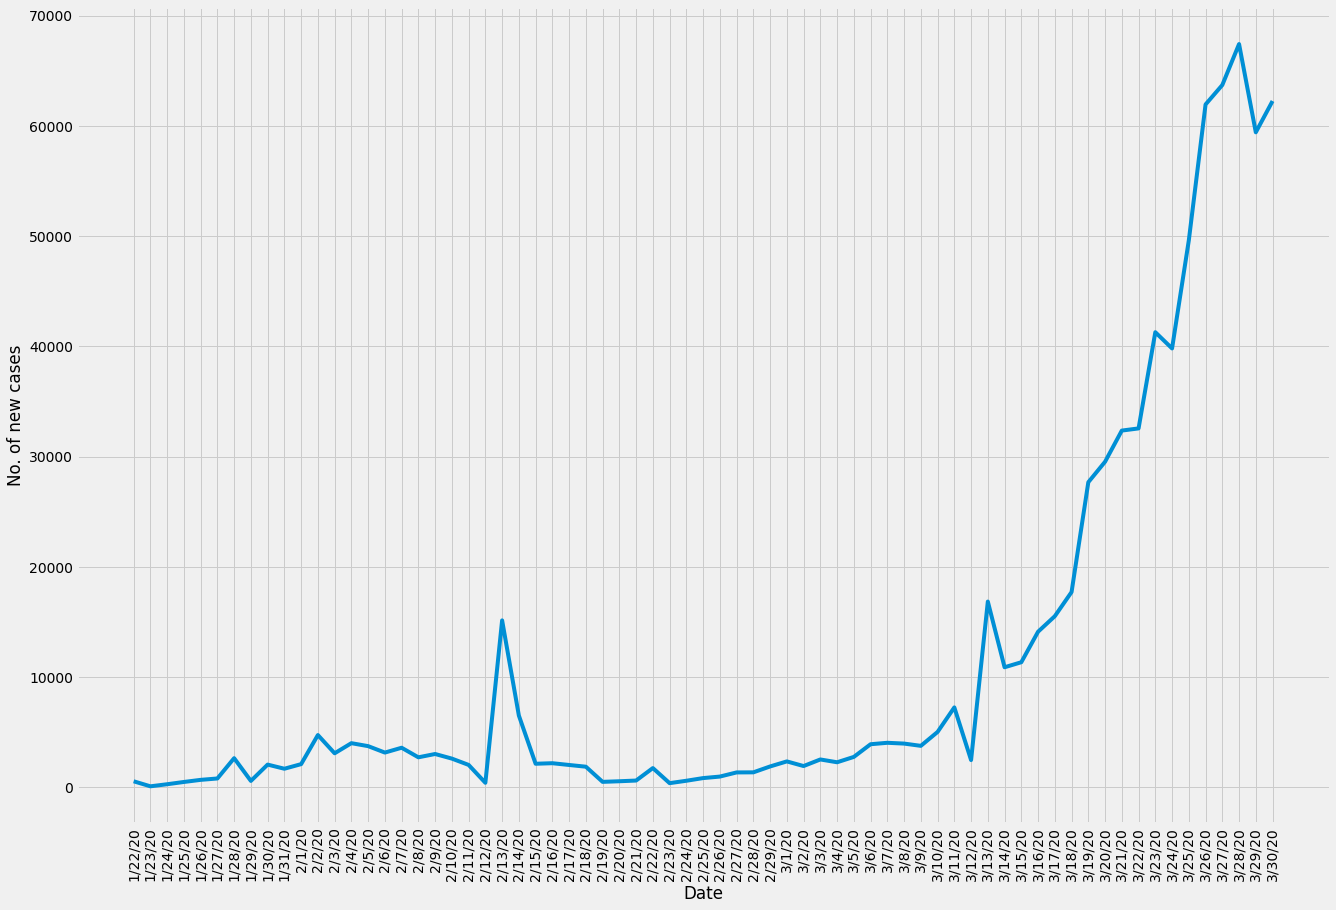

In [19]:
plt.figure(figsize=(20,14))
plt.plot(cases.index,cases)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("No. of new cases")
plt.savefig("NewCasesGlobal.png")
plt.show()

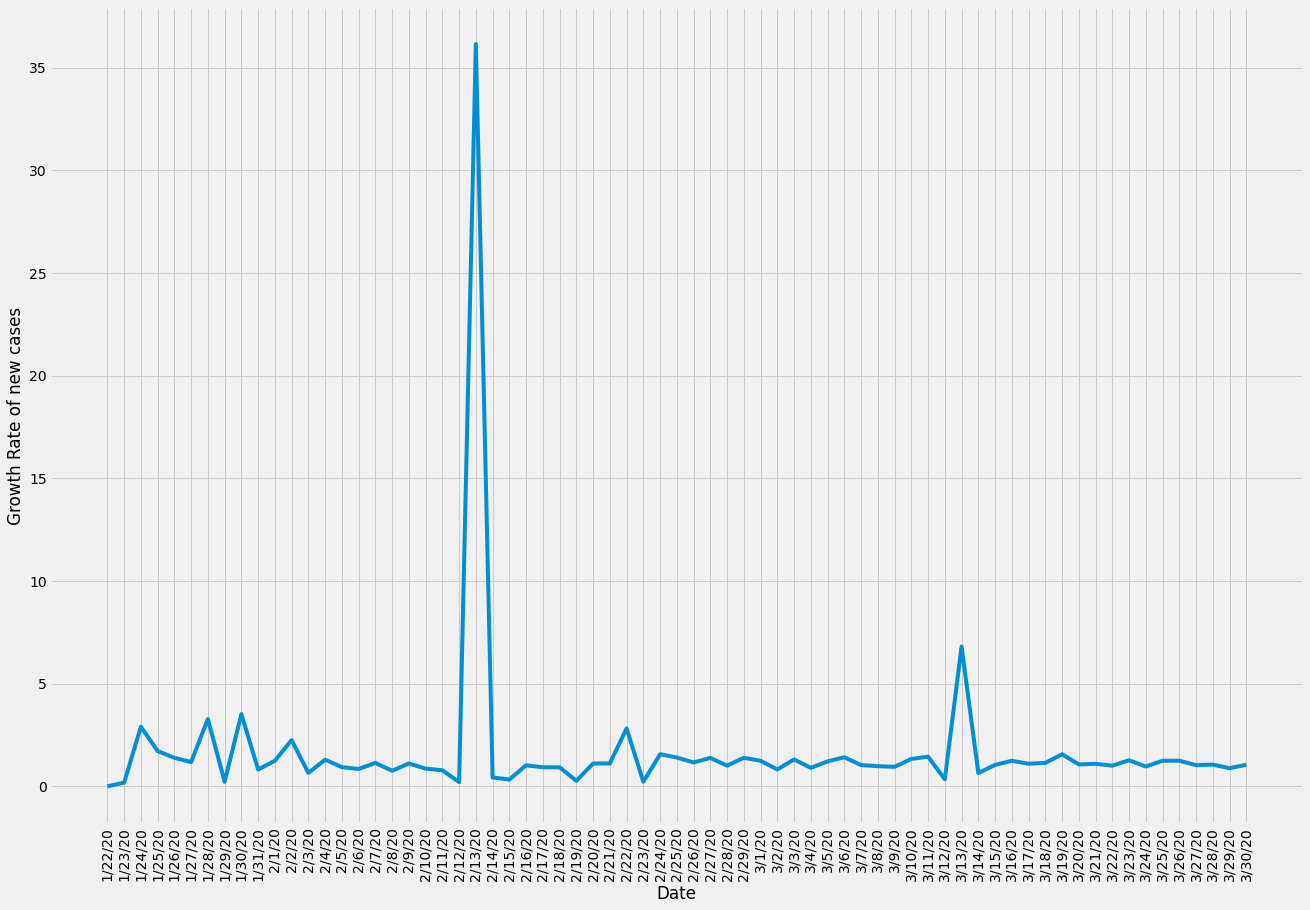

In [20]:
plt.figure(figsize=(20,14))
plt.plot(cases.index,rate)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Growth Rate of new cases")
plt.savefig("GrowthRateGlobal.png")
display()

In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:363.66651262226304
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:302.639514764267
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:327.858661629656
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:234.2137650487454
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:307.1267078888788
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:289.9483555656966
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:215.97759910173076
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:195.5999892407956
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:360.38841352016044
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:299.30937617208656
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:323.7991177721718
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:230.82625530587836
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:309.08350434991456
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:287.0104573092868
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:217.87993980153982
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:192.82335675948755
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:395.2360131144701
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:327.1565175643873
ARIM

In [23]:
mod = sm.tsa.statespace.SARIMAX(y[:61],
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0843      0.434     -0.194      0.846      -0.935       0.767
ar.S.L12      -0.4470      0.032    -13.964      0.000      -0.510      -0.384
ma.S.L12       1.0000    5.6e+04   1.78e-05      1.000    -1.1e+05     1.1e+05
sigma2         7.3936   4.14e+05   1.78e-05      1.000   -8.12e+05    8.12e+05


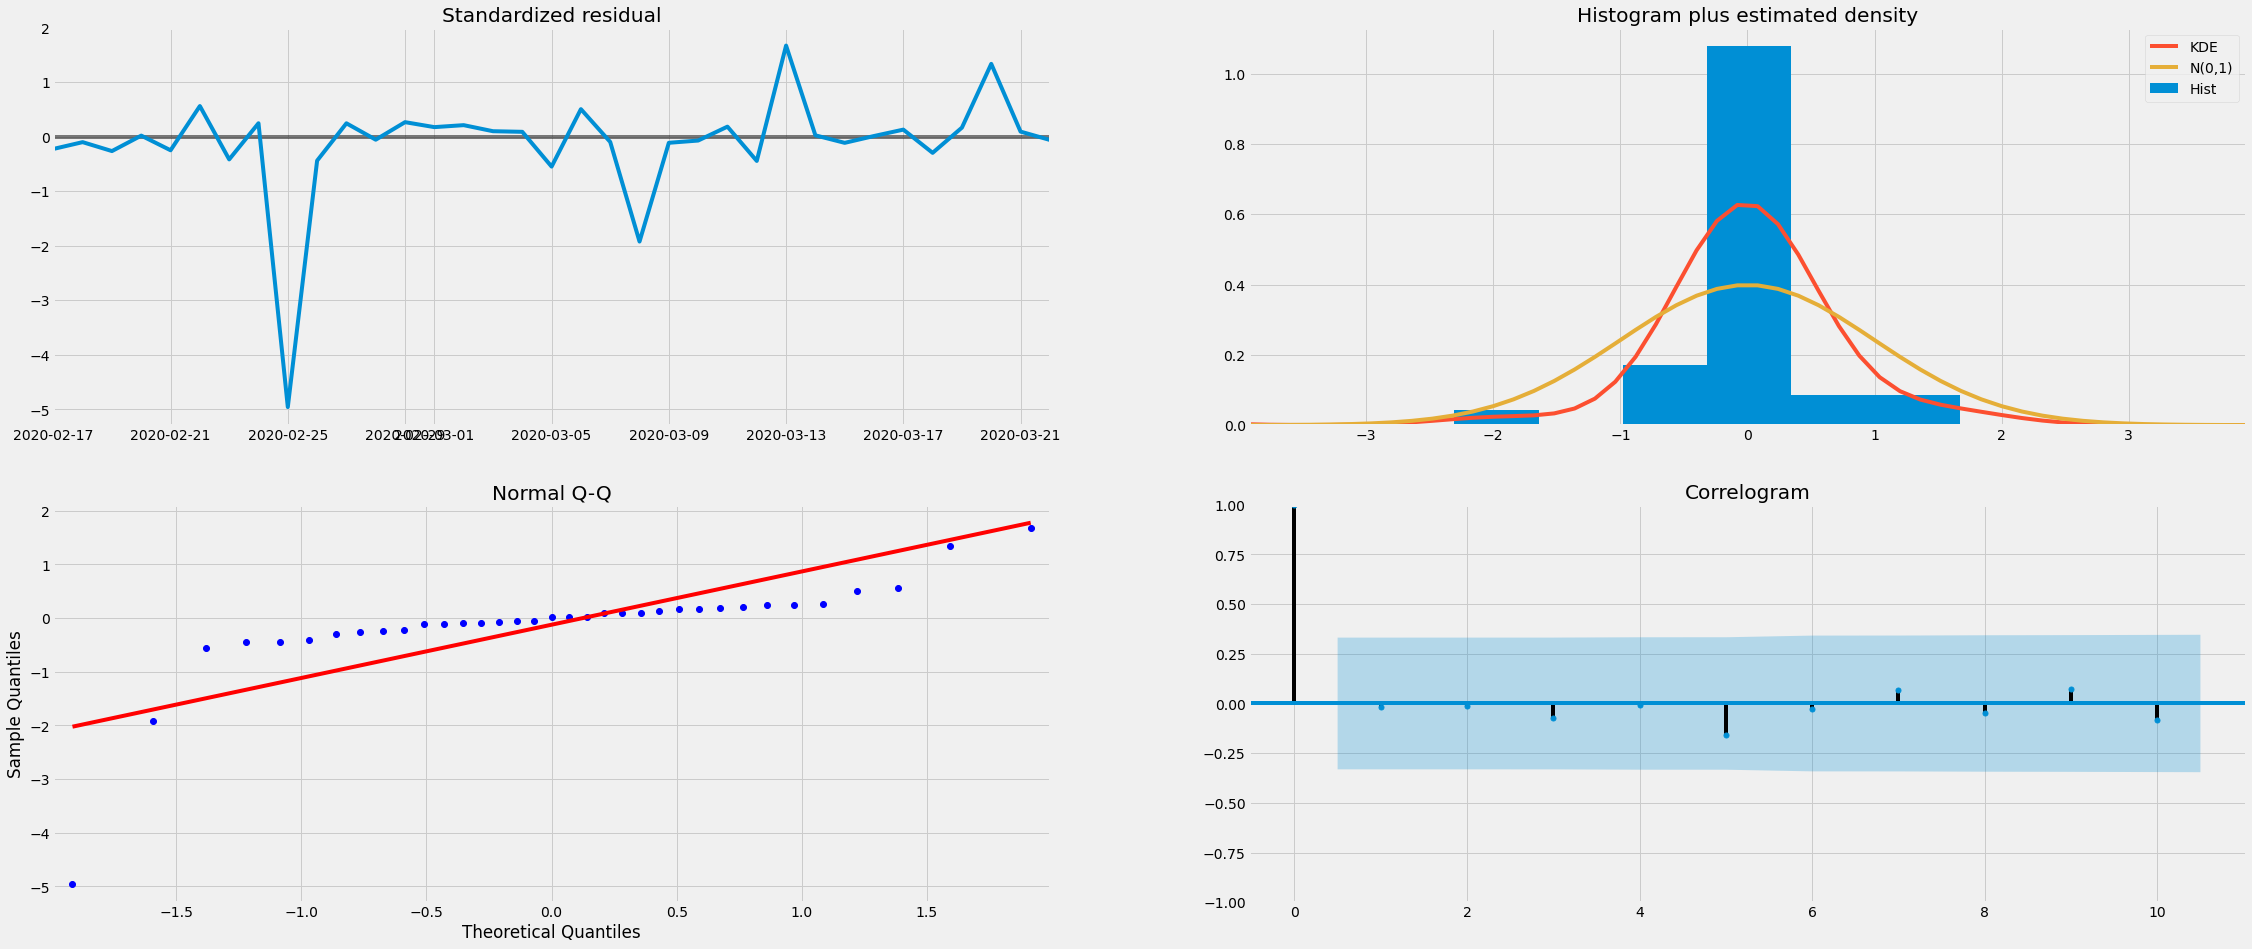

In [24]:
results.plot_diagnostics(figsize=(35, 15))
plt.show()

In [0]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


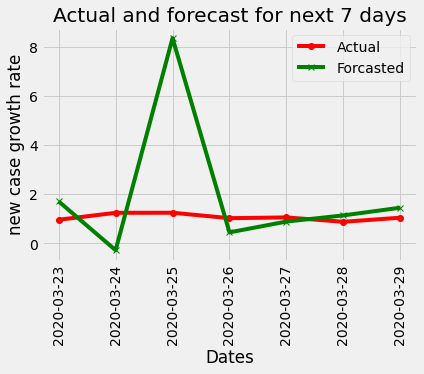

In [26]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='Actual')
plt.plot(x, Y2, color = 'green',marker = 'x',label='Forcasted')
plt.xlabel("Dates")
plt.ylabel('new case growth rate')
plt.xticks(rotation=90)
plt.legend()
plt.title('Actual and forecast for next 7 days')
plt.savefig("forecasted-overall.eps")
plt.show()

## US 

In [0]:
casesUS =actualConfirmedDF.loc['US']
rate=getRate(casesUS)
y = pd.Series(rate, index =cases.index) 

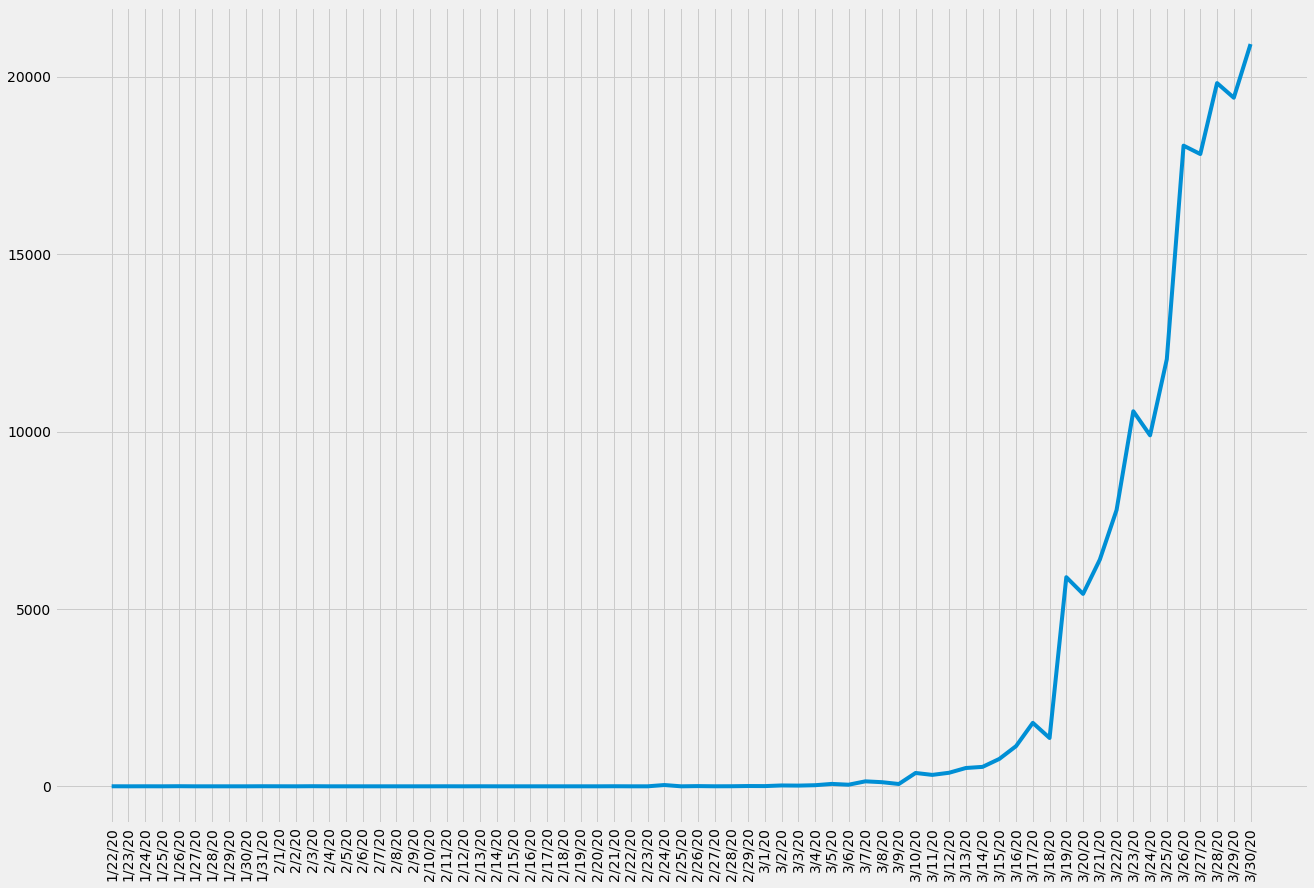

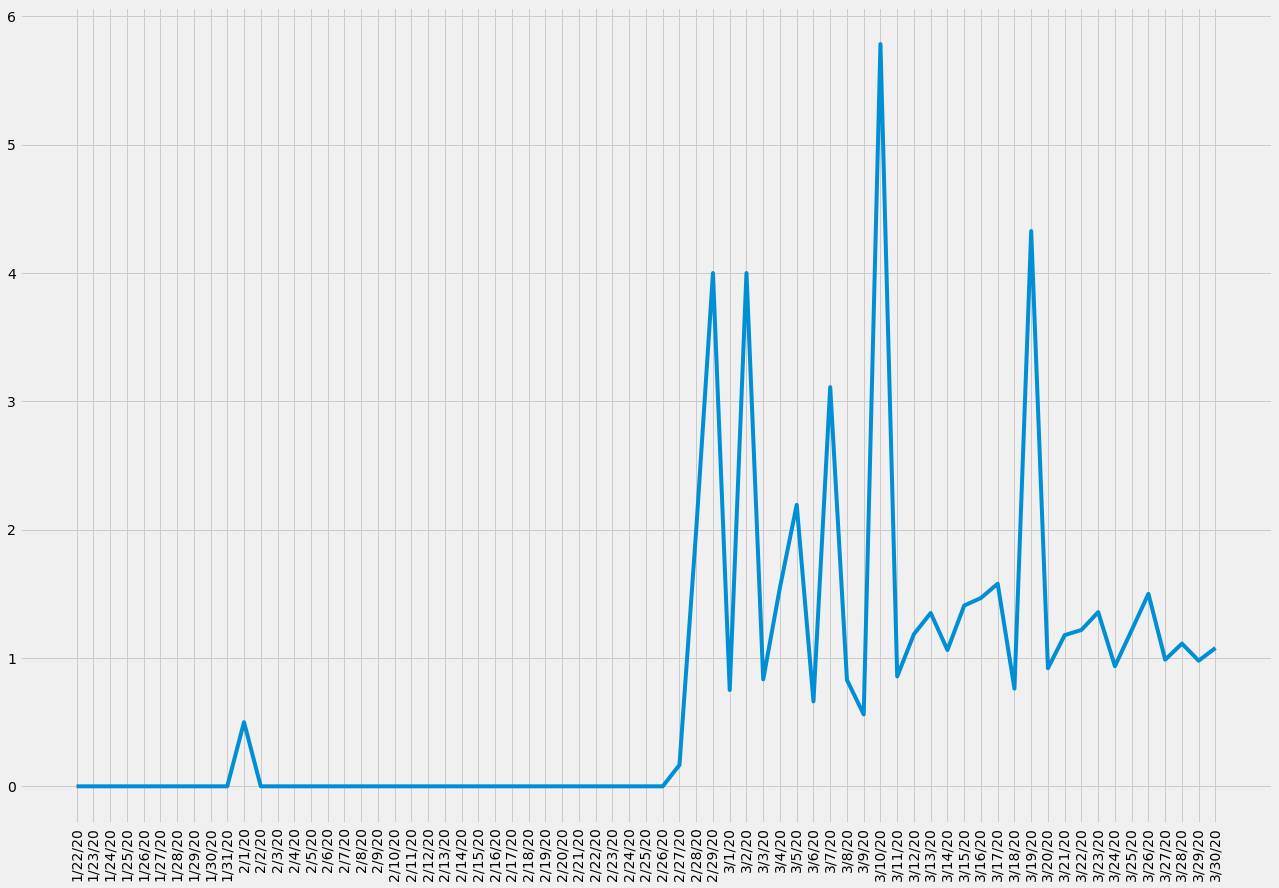

In [28]:
countryWisePlot('US',actualConfirmedDF)

In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [30]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:215.86739178140712
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:179.41894008898777
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:185.7036305321243
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:152.28954769212075
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:179.9548943277459
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:179.35271484382048
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:147.35948556336118
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:146.50683808879887
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:207.33371328845098
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:174.74814427711271
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:183.82099347557065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:150.44026910323373
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:178.48705961441348
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:175.40699199074496
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:146.77689508924607
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:143.10587343709673
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:216.3150193439474
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:185.0259681453

In [31]:
mod = sm.tsa.statespace.SARIMAX(y[:61],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3037      0.204     -1.487      0.137      -0.704       0.097
ma.L1         -0.6825      0.145     -4.703      0.000      -0.967      -0.398
ar.S.L12      -1.0810      0.295     -3.669      0.000      -1.658      -0.504
sigma2         1.8131      0.289      6.271      0.000       1.246       2.380


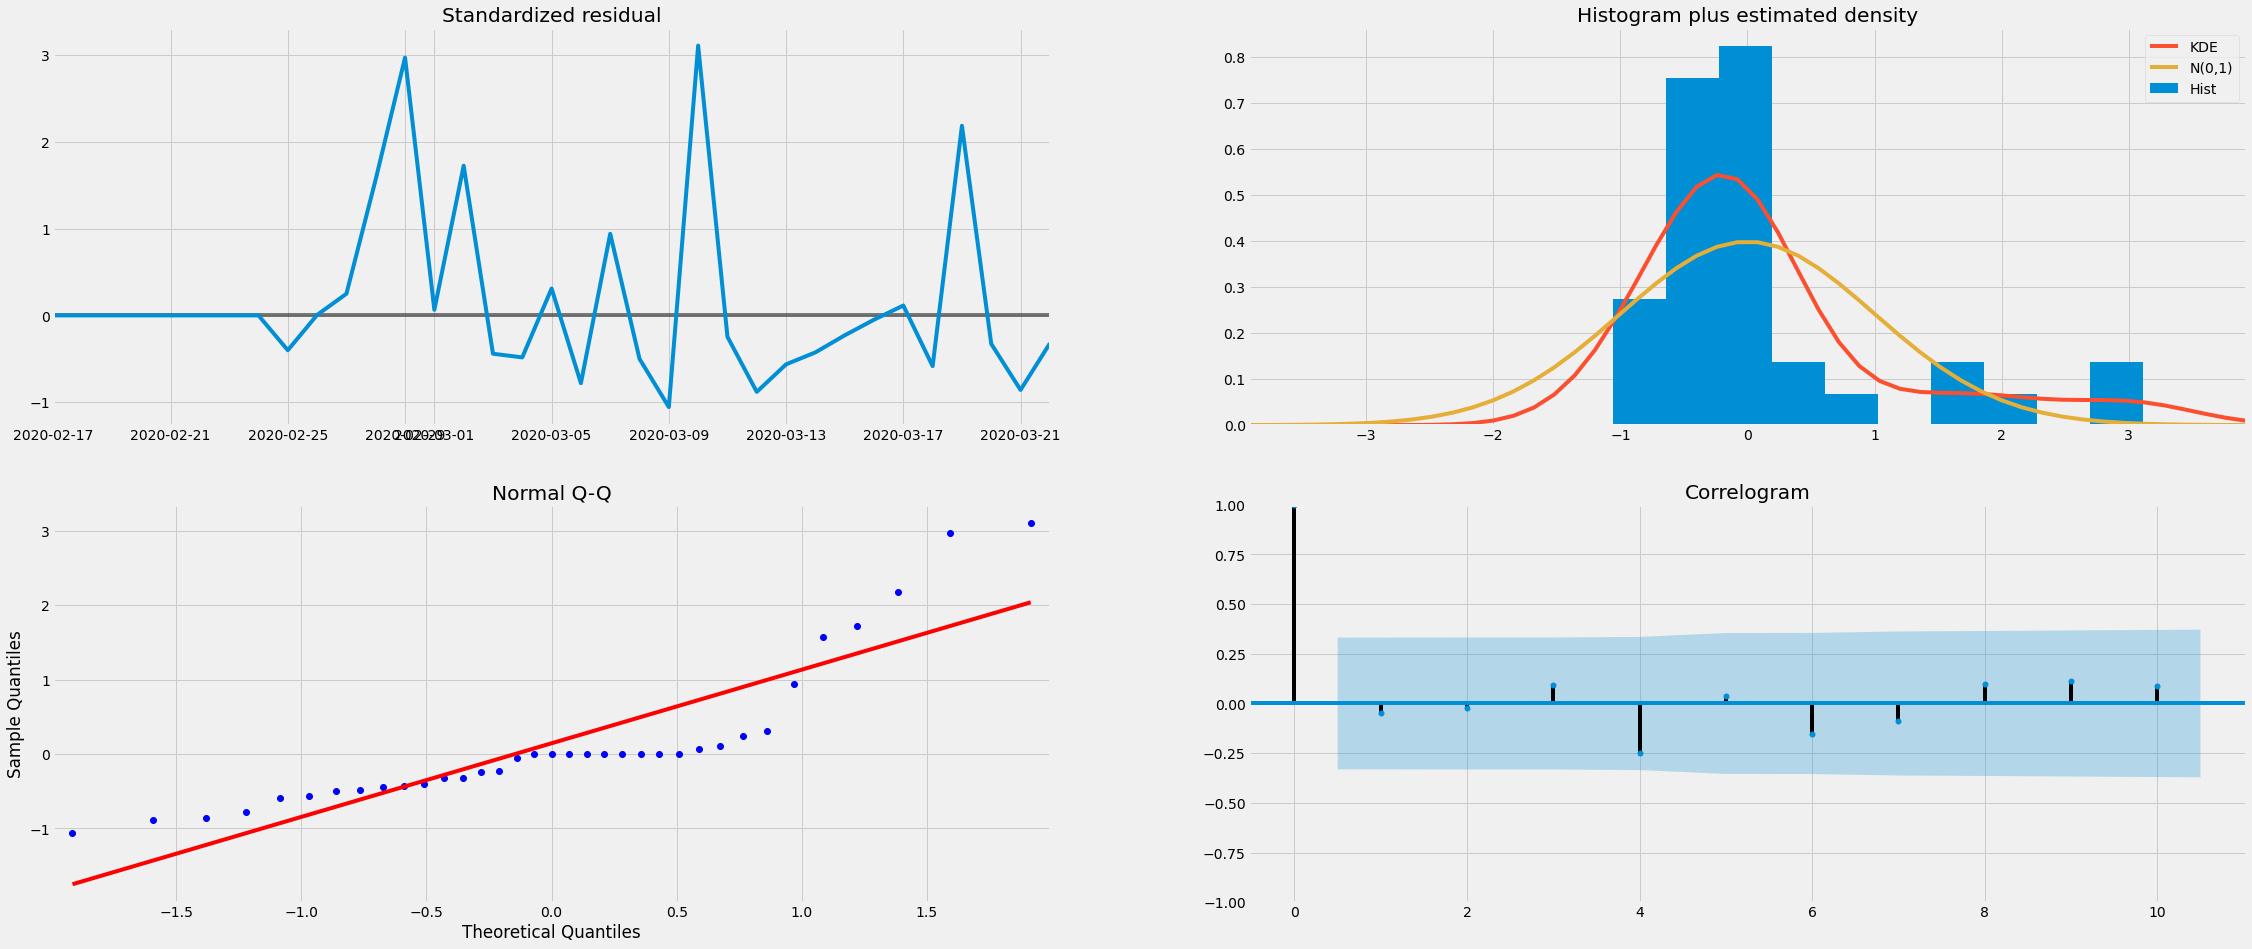

In [32]:
results.plot_diagnostics(figsize=(35, 15))
plt.show()

In [0]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


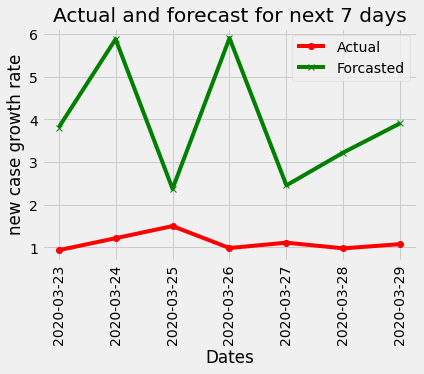

In [34]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='Actual')
plt.plot(x, Y2, color = 'green',marker = 'x',label='Forcasted')
plt.xlabel("Dates")
plt.ylabel('new case growth rate')
plt.xticks(rotation=90)
plt.legend()
plt.title('Actual and forecast for next 7 days')
plt.savefig("forecasted-us.eps")
plt.show()

# Italy

In [0]:
casesItaly =actualConfirmedDF.loc['Italy']
rate=getRate(casesItaly)
y = pd.Series(rate, index =cases.index) 

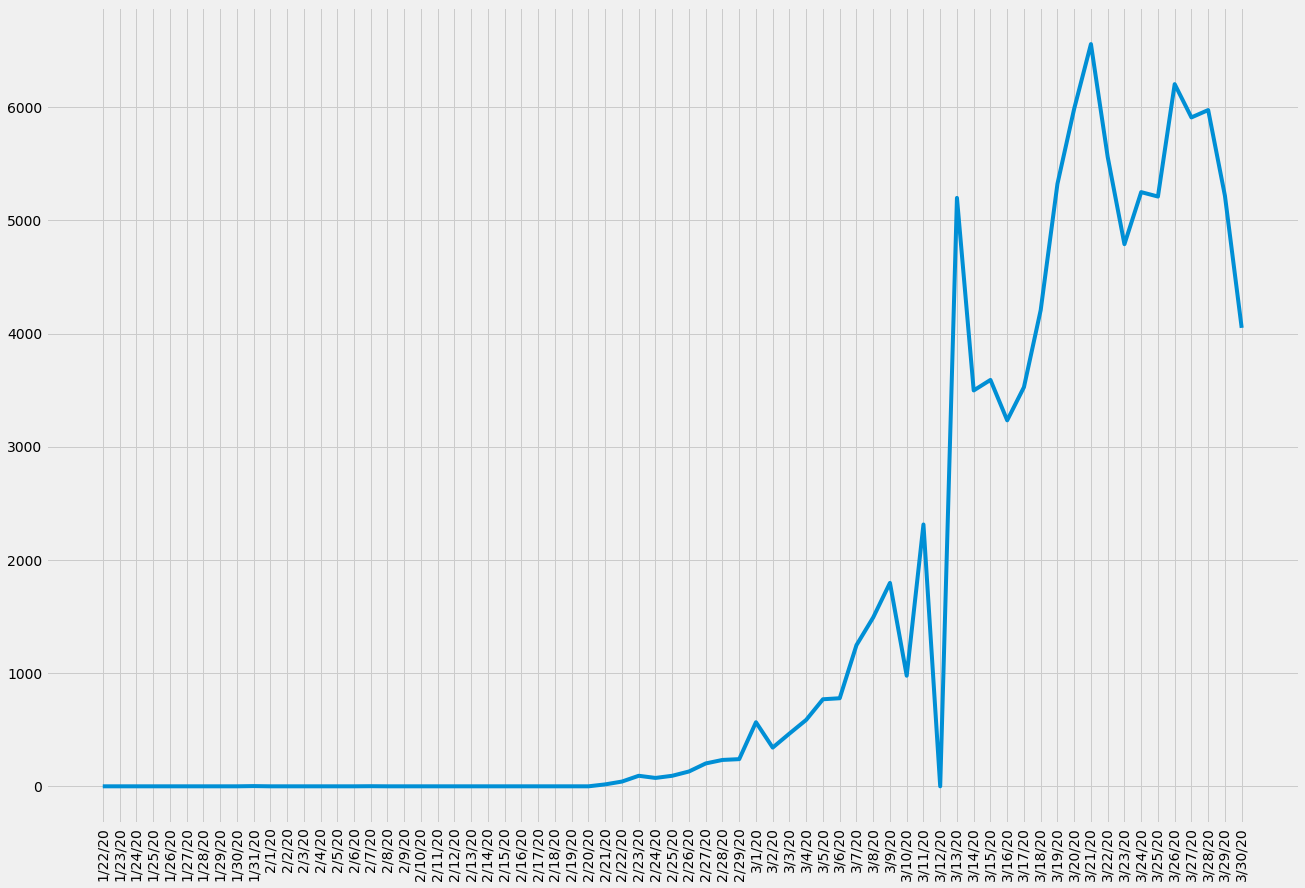

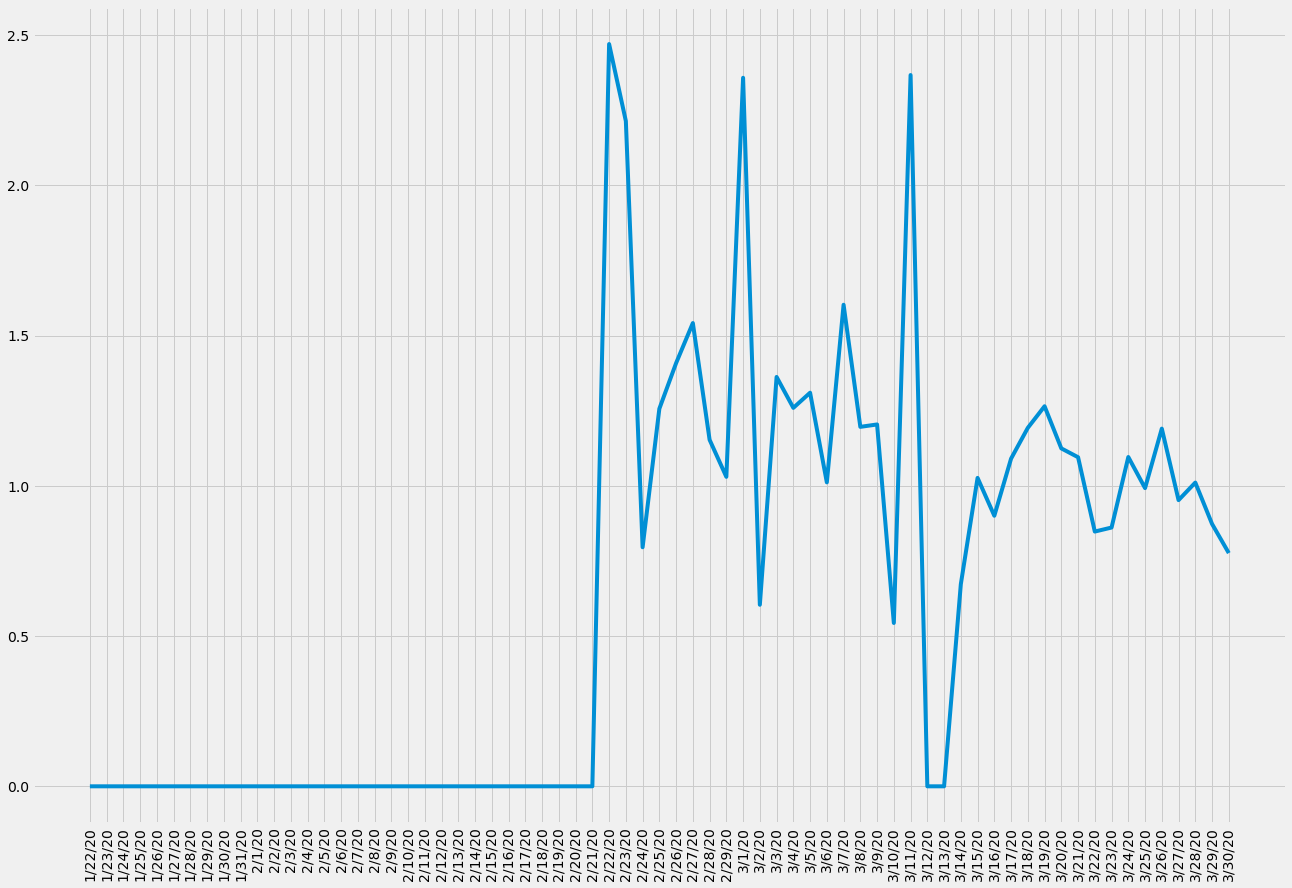

In [36]:
countryWisePlot('Italy',actualConfirmedDF)

In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [38]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:164.9981972219145
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:135.69954859671614
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:132.35088789365955
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:106.62888399882196
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:130.08410149200444
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:130.04104584748978
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:109.17432869489079
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:107.05068296137698
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:139.12217895051054
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:119.12752231341543
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:120.93196073649807
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:96.1849704848347
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:117.8115773448364
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:116.9292998860466
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:100.9063433706237
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:98.08340316105415
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:118.13138383791673
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:106.84319215896473

In [39]:
mod = sm.tsa.statespace.SARIMAX(y[:61],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9587      0.046     20.725      0.000       0.868       1.049
ma.L1         -0.6836      0.161     -4.253      0.000      -0.999      -0.369
ar.S.L12      -0.4308      0.348     -1.237      0.216      -1.114       0.252
ma.S.L12      -1.0001   2251.033     -0.000      1.000   -4412.944    4410.944
sigma2         0.3120    702.368      0.000      1.000   -1376.304    1376.928


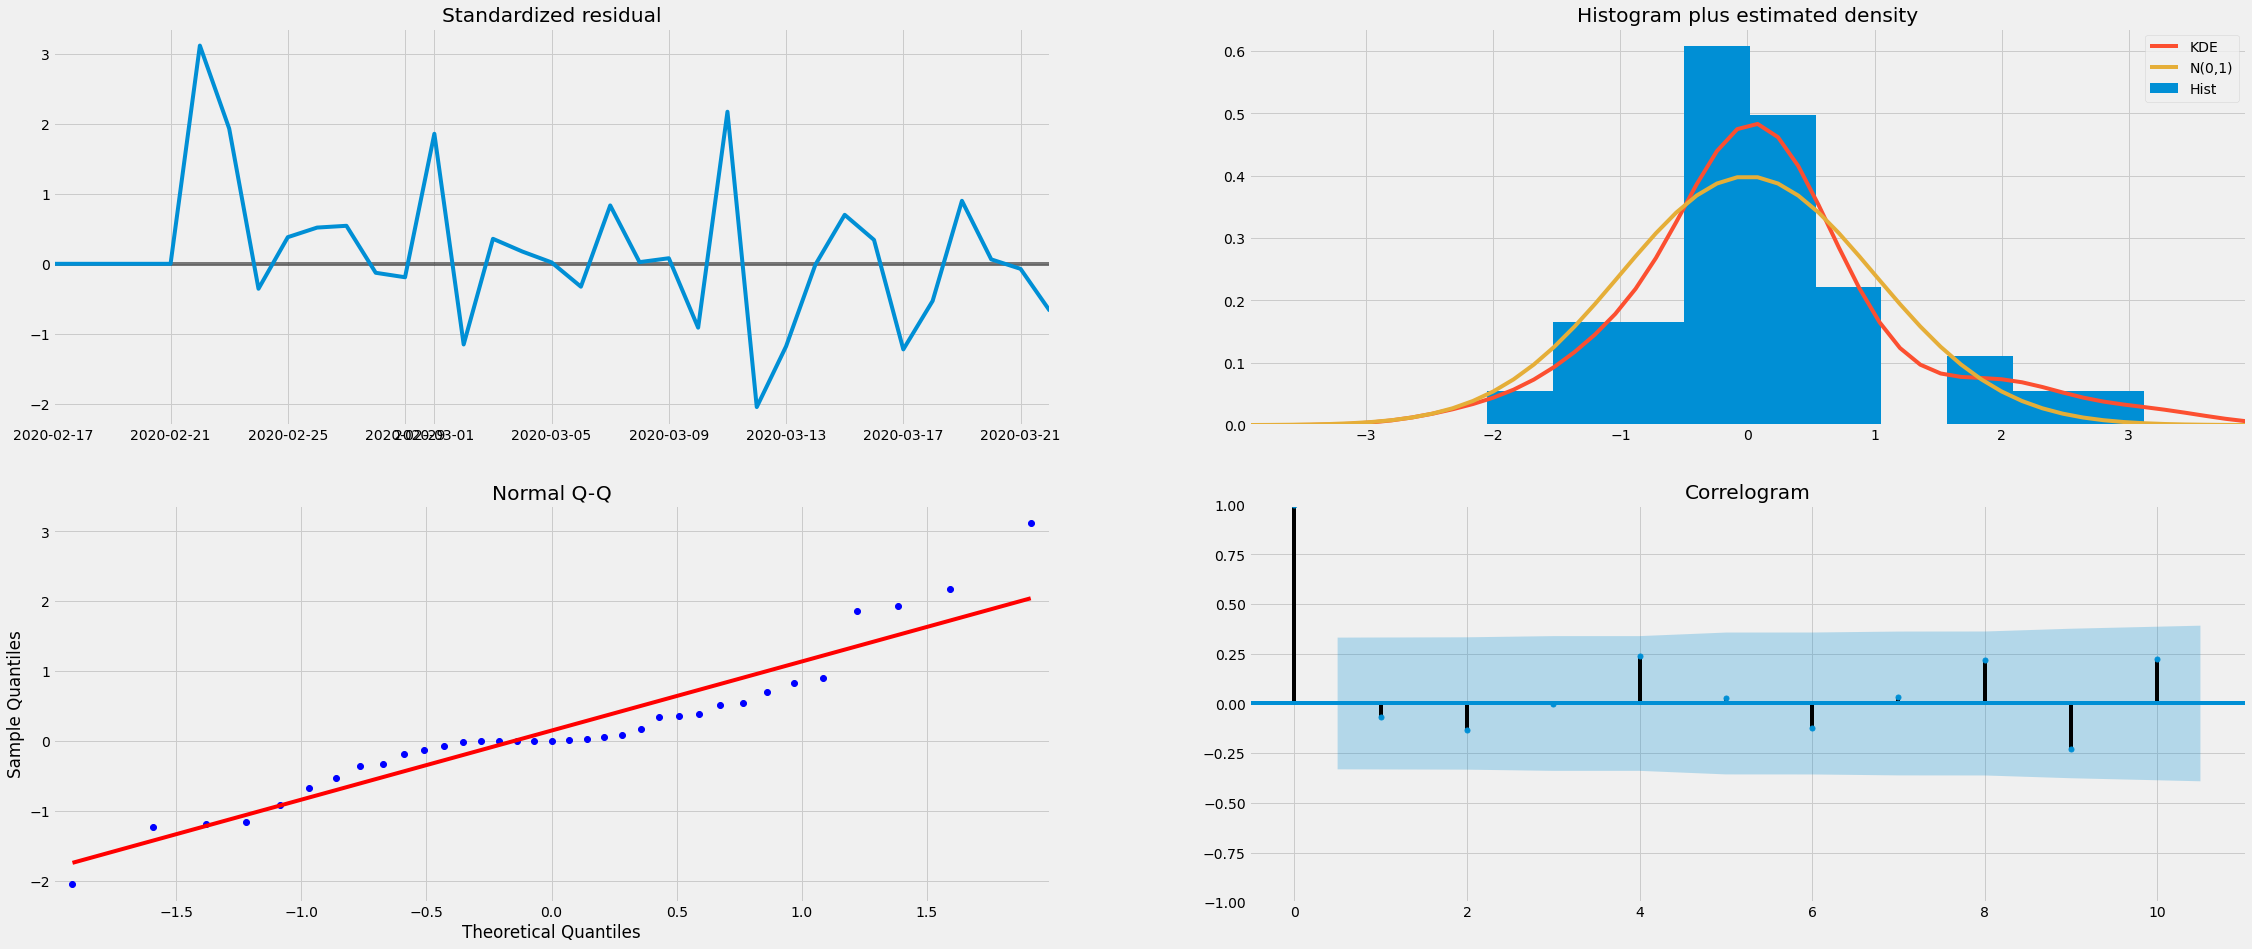

In [40]:
results.plot_diagnostics(figsize=(35, 15))
plt.show()

In [0]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


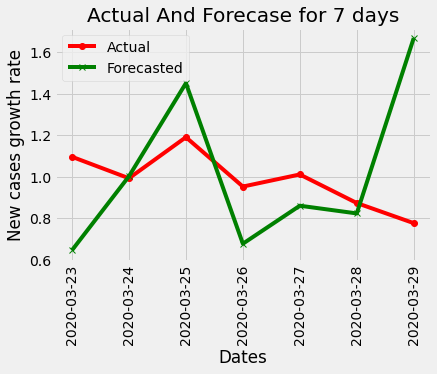

In [42]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='Actual')
plt.plot(x, Y2, color = 'green',marker = 'x',label='Forecasted')
plt.xlabel("Dates")
plt.ylabel('New cases growth rate')
plt.xticks(rotation=90)
plt.legend()
plt.title("Actual And Forecast for 7 days")
plt.savefig("forecasted-italy.eps")
plt.show()

# China

In [0]:
casesItaly =actualConfirmedDF.loc['China']
rate=getRate(casesItaly)
y = pd.Series(rate, index =cases.index) 

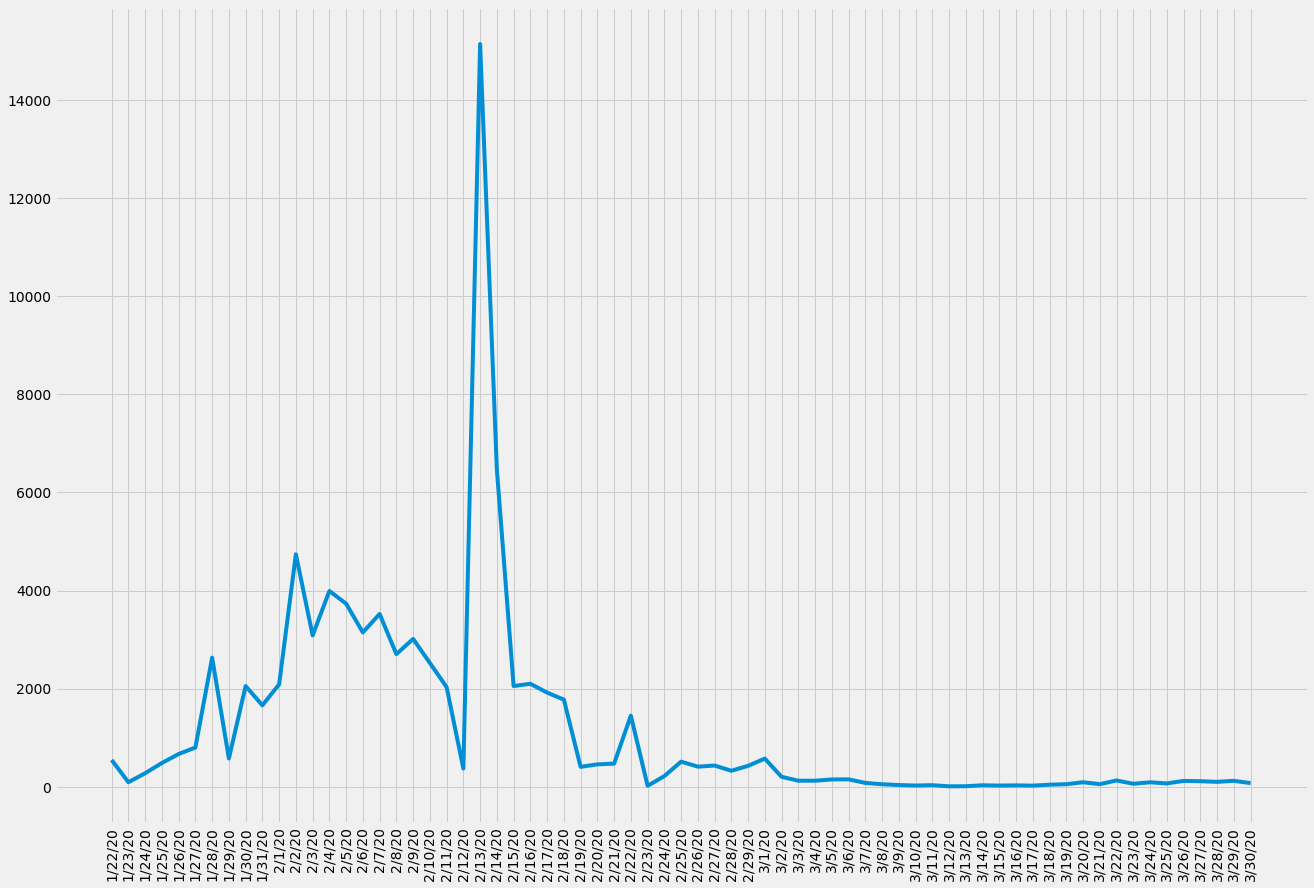

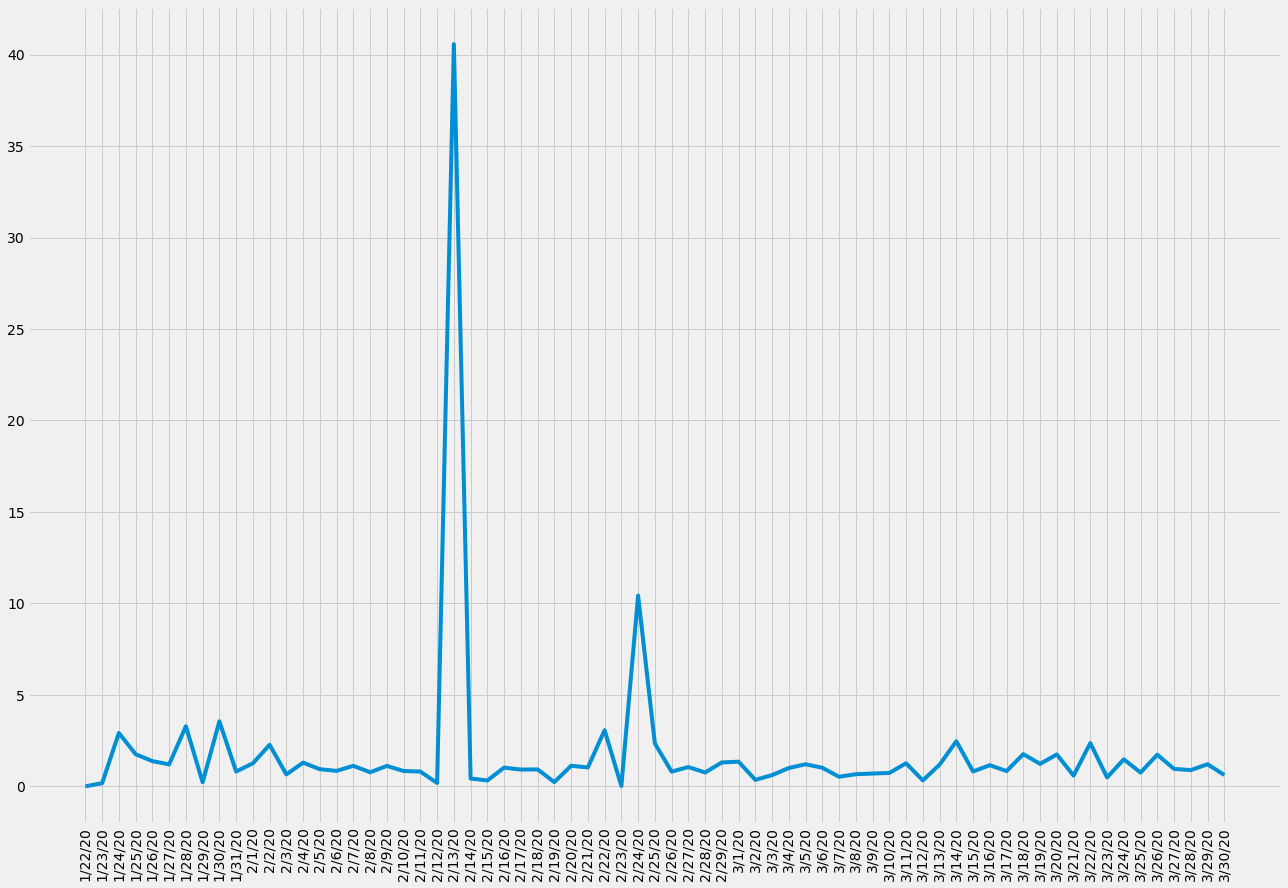

In [44]:
countryWisePlot('China',actualConfirmedDF)

In [0]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [46]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:378.52407216603
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:314.85205416233435
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:340.69892114940683
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:214.94956875174597
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:319.60963140548034
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:302.231686234434
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:228.84943207824332
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:214.14248674589965
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:375.04747596640794
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:311.2553778662642
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:335.3675489272728
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:211.44078265269405
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:321.6050177875801
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:299.03749429360926
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:230.22385413037506
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:210.52641489587003
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:410.2702913995667
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:339.4707584412871
AR

In [47]:
mod = sm.tsa.statespace.SARIMAX(y[:61],
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1384      0.209     -0.662      0.508      -0.548       0.271
ma.S.L12      -1.0007     91.464     -0.011      0.991    -180.267     178.265
sigma2        15.2300   1394.515      0.011      0.991   -2717.970    2748.430


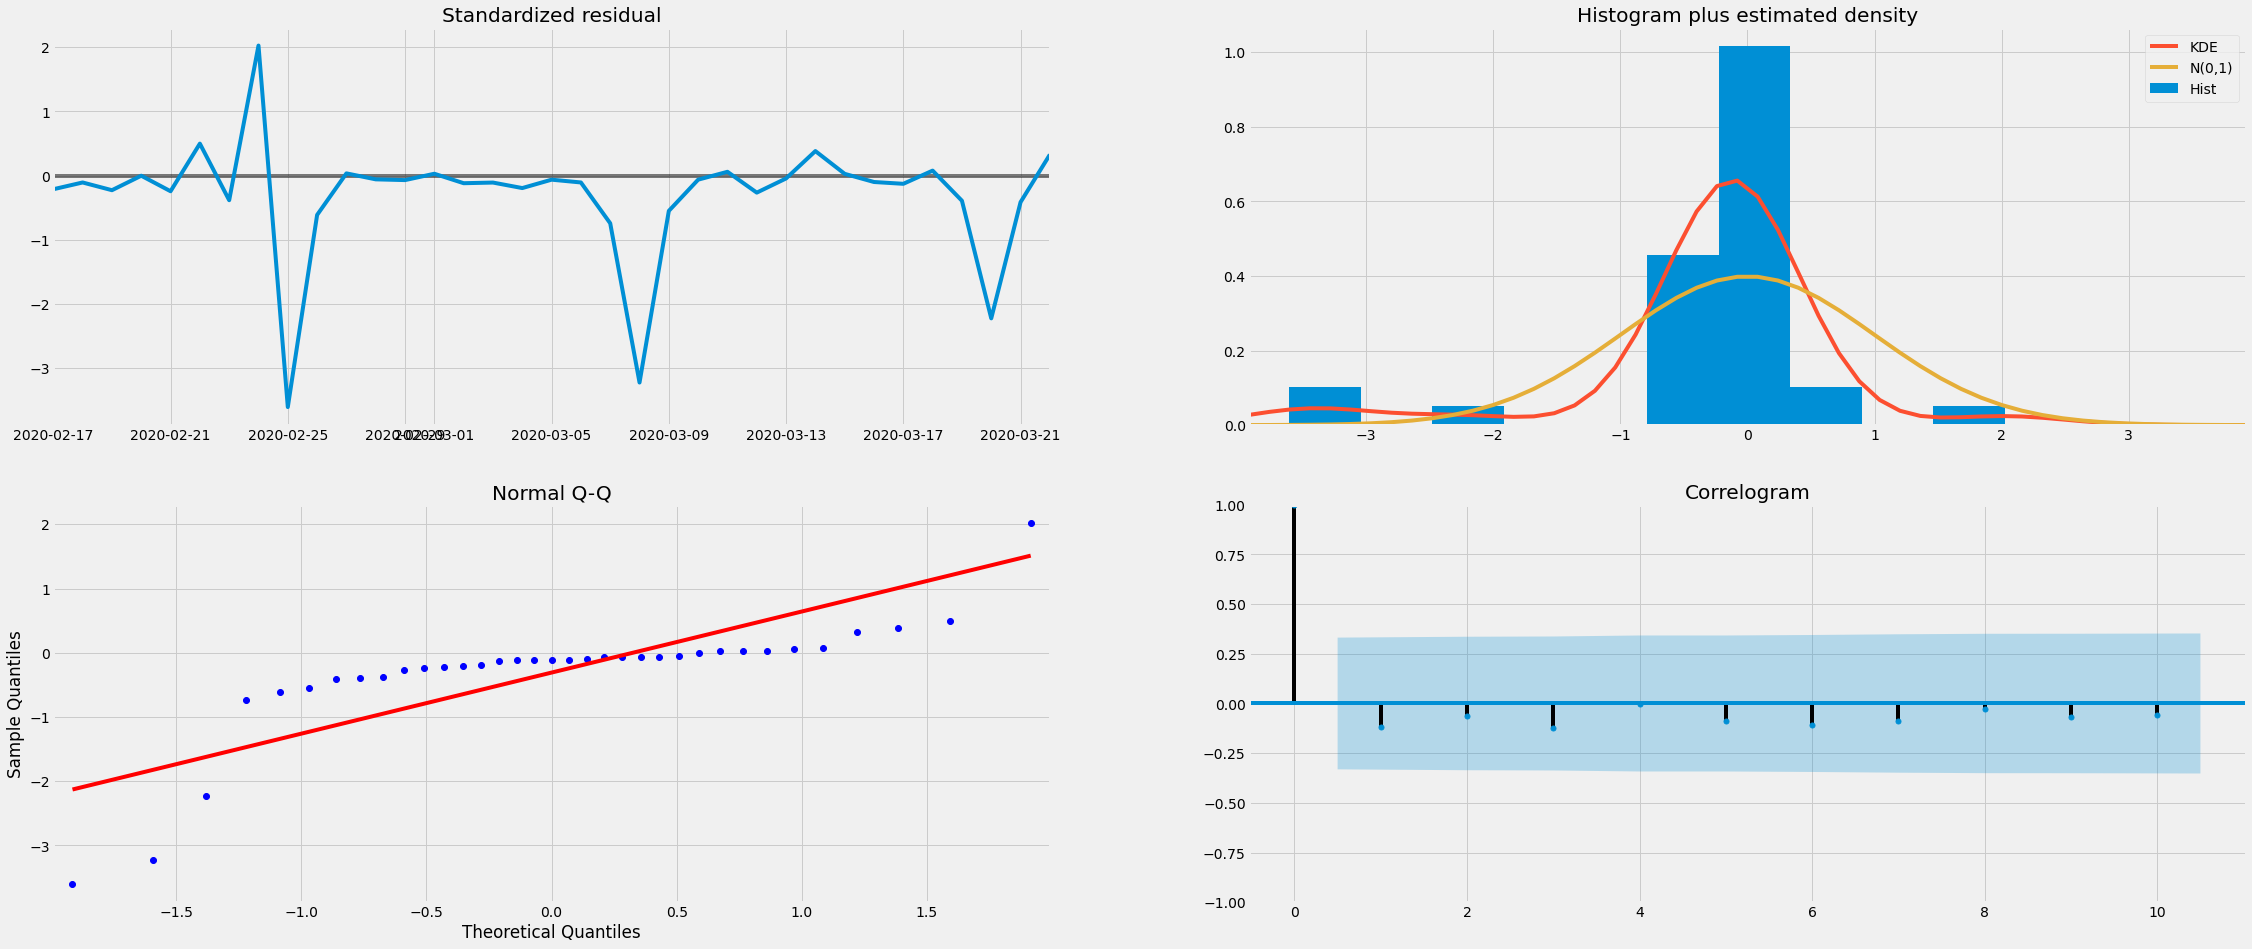

In [48]:
results.plot_diagnostics(figsize=(35, 15))
plt.show()

In [0]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


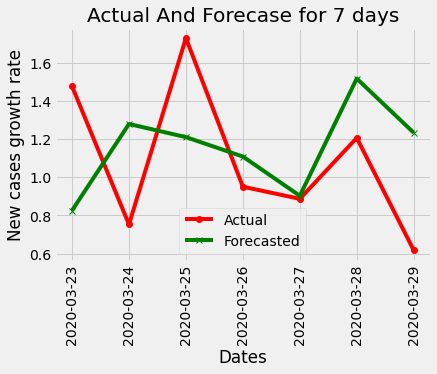

In [50]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='Actual')
plt.plot(x, Y2, color = 'green',marker = 'x',label='Forecasted')
plt.xlabel("Dates")
plt.ylabel('New cases growth rate')
plt.xticks(rotation=90)
plt.legend()
plt.title("Actual And Forecast for 7 days")
plt.savefig("forecasted-china.eps")
plt.show()